/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Logistic Regression on Experience:
Coefficient: [[ 1.64878571]
 [-0.03395933]
 [-1.61482638]]
Intercept: [-26.84183443   5.60753072  21.23430371]
Label Mapping (Manual): {'Prof': 1, 'Asso': 2, 'Asst': 3}


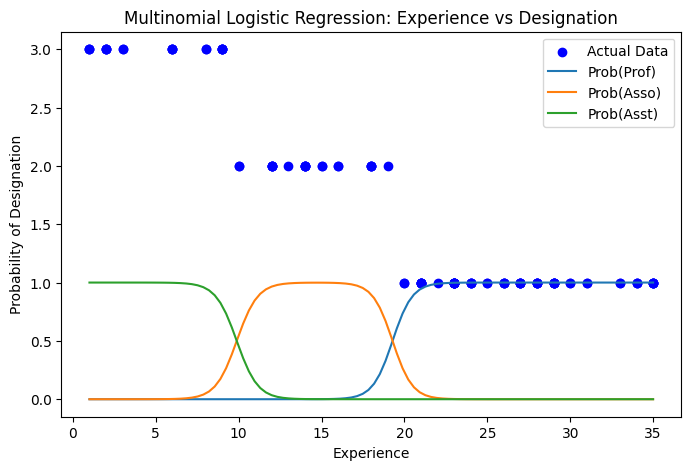

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Logistic Regression on Age:
Coefficient: [[ 0.93801313]
 [ 0.00644036]
 [-0.94445349]]
Intercept: [-40.48907524   2.48924356  37.99983168]
Label Mapping (Manual): {'Prof': 1, 'Asso': 2, 'Asst': 3}


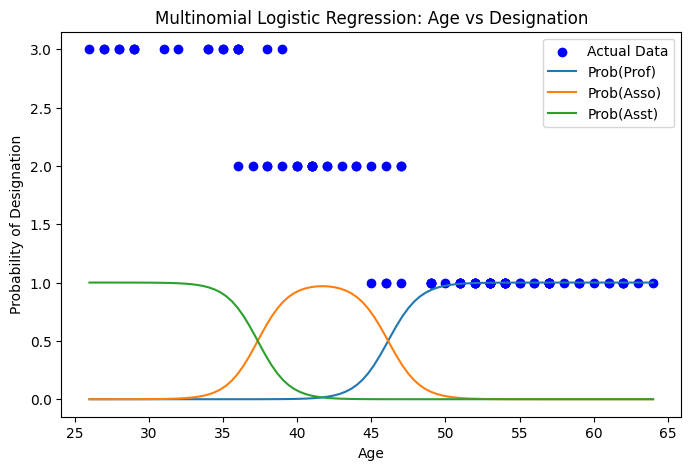

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

class FacultyData:
    def __init__(self, num_samples=100):
        self.num_samples = num_samples
        self.df = self.generate_data()

    def generate_data(self):

        data = []
        for _ in range(self.num_samples):
            experience = random.randint(1, 35)
            age = experience + random.randint(25, 30)


            if experience < 10:
                designation, factor = "Asst", 3
            elif 10 <= experience < 20:
                designation, factor = "Asso", 2
            else:
                designation, factor = "Prof", 1

            data.append([experience, age, designation, factor])

        df = pd.DataFrame(data, columns=["Experience", "Age", "Designation", "Designation_Factor"])
        return df

    def logistic_regression(self, predictor):

        X = self.df[[predictor]]
        y = self.df["Designation_Factor"]

        model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
        model.fit(X, y)

        print(f"\nLogistic Regression on {predictor}:")
        print(f"Coefficient: {model.coef_}")
        print(f"Intercept: {model.intercept_}")
        print(f"Label Mapping (Manual): {{'Prof': 1, 'Asso': 2, 'Asst': 3}}")

        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        probabilities = model.predict_proba(X_range)


        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, color='blue', label='Actual Data')


        for i, class_label in {1: "Prof", 2: "Asso", 3: "Asst"}.items():
            plt.plot(X_range, probabilities[:, i - 1], label=f"Prob({class_label})")

        plt.xlabel(predictor)
        plt.ylabel("Probability of Designation")
        plt.title(f"Multinomial Logistic Regression: {predictor} vs Designation")
        plt.legend()
        plt.show()


faculty_data = FacultyData(num_samples=100)
faculty_data.logistic_regression("Experience")
faculty_data.logistic_regression("Age")
